In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
class Config: pass

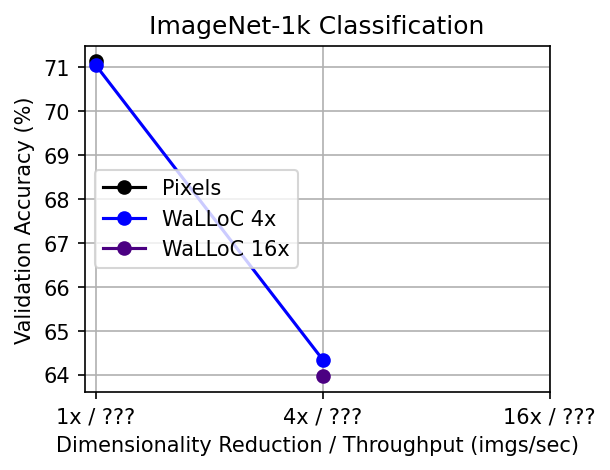

In [81]:
patch_sizes = [1, 2, 3]

# pixels_acc = [71.13, 64.114, 50.614]
pixels_acc = [71.13, np.nan, np.nan]
walloc_4x_acc = [71.036, 64.336, np.nan]
walloc_16x_acc = [np.nan, 63.96, np.nan]

plt.figure(figsize=(4, 3), dpi=150)
plt.plot(patch_sizes, pixels_acc, marker='o', label='Pixels', color='black')
ax = plt.gca()
ax.plot(patch_sizes, walloc_4x_acc, marker='o', label='WaLLoC 4x', color='blue')
ax.plot(patch_sizes, walloc_16x_acc, marker='o', label='WaLLoC 16x', color='indigo')

ax.set_title('ImageNet-1k Classification')
ax.set_xlabel('Dimensionality Reduction / Throughput (imgs/sec)')
ax.set_ylabel('Validation Accuracy (%)')
ax.grid(True)
ax.set_xticks(patch_sizes)
ax.set_xticklabels(['1x / ???', '4x / ???', '16x / ???'])
ax.legend(loc='center left')

# ax.text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING', 
#          fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30,
#          transform=plt.gca().transAxes);

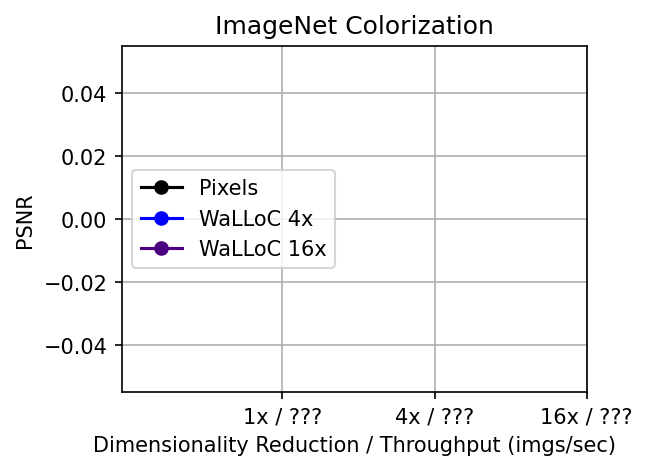

In [82]:
patch_sizes = [1, 2, 3]
pixels_psnr = [np.nan, np.nan, np.nan]
walloc_4x_psnr = [np.nan, np.nan, np.nan]
walloc_16x_psnr = [np.nan, np.nan, np.nan]

plt.figure(figsize=(4, 3), dpi=150)
plt.plot(patch_sizes, pixels_psnr, marker='o', label='Pixels', color='black')
ax = plt.gca()
ax.plot(patch_sizes, walloc_4x_psnr, marker='o', label='WaLLoC 4x', color='blue')
ax.plot(patch_sizes, walloc_16x_psnr, marker='o', label='WaLLoC 16x', color='indigo')

ax.set_title('ImageNet Colorization')
ax.set_xlabel('Dimensionality Reduction / Throughput (imgs/sec)')
ax.set_ylabel('PSNR')
ax.grid(True)
ax.set_xticks(patch_sizes)
ax.set_xticklabels(['1x / ???', '4x / ???', '16x / ???'])
ax.legend(loc='center left')

# ax.text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING', 
#          fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30,
#          transform=plt.gca().transAxes);
# # ax.invert_xaxis()

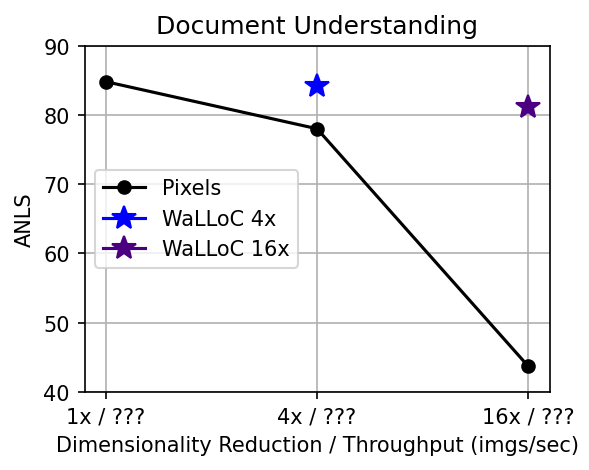

In [78]:
seq_length = [224, 448, 896]
pixels_anls = [43.7, 78.0, 84.8]
walloc_4x_anls = [np.nan, 84.1, np.nan]
walloc_16x_anls = [81.1, np.nan, np.nan]

plt.figure(figsize=(4, 3), dpi=150)
plt.plot(patch_sizes, pixels_anls, marker='o', label='Pixels', color='black')
ax = plt.gca()
ax.plot(patch_sizes, walloc_4x_anls, marker='*', label='WaLLoC 4x', color='blue', markersize=12)
ax.plot(patch_sizes, walloc_16x_anls, marker='*', label='WaLLoC 16x', color='indigo', markersize=12)
ax.legend(loc='center left')

ax.set_title('Document Understanding')
ax.set_xlabel('Dimensionality Reduction / Throughput (imgs/sec)')
ax.set_ylabel('ANLS')
ax.set_ylim([40,90])
ax.grid(True)
ax.set_xticks(patch_sizes)
ax.set_xticklabels(['16x / ???', '4x / ???', '1x / ???'])
ax.invert_xaxis()

# ax.text(0.5, 0.5, 'SPECULATIVE RESULTS\nEXPERIMENTS STILL RUNNING', 
#          fontsize=30, color='gray', alpha=0.5, ha='center', va='center', rotation=30,
#          transform=plt.gca().transAxes);

In [46]:
cf = "log_cuda:0.pth"
checkpoint = torch.load(cf,map_location="cpu")
print(checkpoint['i_epoch'])
-10*np.log10(checkpoint['valid_loss'][-1])

7


22.186500205032374

In [47]:
cf = "log_cuda:1.pth"
checkpoint = torch.load(cf,map_location="cpu")
print(checkpoint['i_epoch'])
-10*np.log10(checkpoint['valid_loss'][-1])

7


21.866626164913626

In [48]:
cf = "log_cuda:3.pth"
checkpoint = torch.load(cf,map_location="cpu")
print(checkpoint['i_epoch'])
-10*np.log10(checkpoint['valid_loss'][-1])

11


21.58578829705874

In [50]:
cf = "log_cuda:2.pth"
checkpoint = torch.load(cf,map_location="cpu")
print(checkpoint['i_epoch'])
checkpoint['valid_acc'][-1]

87


0.5571